In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Имеются следующие данные:

date – дата (2020-03-02 00:00:00 – 2020-03-02 01:29:05)
name – имя пользователя
transaction – статус транзакции
minute* – сколько минут прошло с начала дня

*Доступна в данных с 5 шага.

1) Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.

In [2]:
df = pd.read_csv('/home/ag/MyProjects/Karpov_Py_course/5/MiniProject/transaction_data.csv')

In [6]:
df

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled
...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull


In [4]:
df.shape

(5315, 3)

In [15]:
df.dtypes  # все строки

date           object
name           object
transaction    object
dtype: object

In [12]:
df.isna().sum()  # пропущенных значений нет

date           0
name           0
transaction    0
dtype: int64

In [11]:
df.drop_duplicates().shape  # дубликатов нет

(5315, 3)

2) Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота. Подумайте, как можно улучшить график.

In [14]:
df.describe() # описательная статистика короткая, т.к. все строки

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


3) Сколько транзакций завершились ошибкой?

In [26]:
df.transaction.value_counts()  # error 4 транзакции

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

<AxesSubplot:ylabel='transaction'>

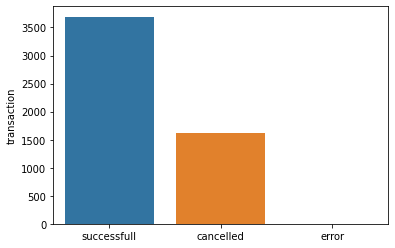

In [29]:
# распределение транзакций в виде графика barplot
# index - серия с названиями статусов транзакций

sns.barplot(x=df.transaction.value_counts().index, 
            y=df.transaction.value_counts())

4) Сколько успешных транзакций осуществил каждый из пользователей? Постройте гистограмму распределения числа успешных транзакций.

In [34]:
# отбираем только успешные транзакции, сортируем по имени и считаем кол-во

users_transaction = df.query('transaction == "successfull"') \
                        .groupby('name') \
                        .agg({'transaction': 'count'})

In [41]:
users_transaction.describe()  # статистика по успешным транзакциям 

,transaction
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


<AxesSubplot:>

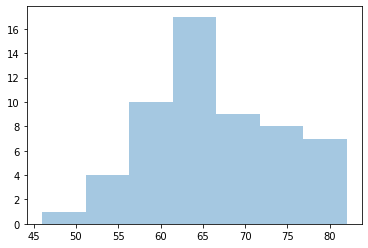

In [38]:
# строим гистрограмму числа успешных транзакций
# для числа случаев, а не долей, по оси y: kde=False

sns.distplot(users_transaction, kde=False)

5) Коллега прислал Вам обновленные данные. 

(transaction_data_updated.csv) Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполните нулями.

In [42]:
df_updated = pd.read_csv('/home/ag/MyProjects/Karpov_Py_course/5/MiniProject/transaction_data_updated.csv')

In [43]:
df_updated

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17
...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13


In [52]:
# группируем по имени и минуте, и считаем число строк в каждой минуте
# переименовываем transaction по смыслу, в кол-во транзакций

transaction_number = df_updated \
                .groupby(['name', 'minute'], as_index=False) \
                .agg({'transaction': 'count'}) \
                .rename(columns={'transaction': 'transaction_number'})

In [53]:
transaction_number

,name,minute,transaction_number
0,Ekaterina_Fedorova,0,3
1,Ekaterina_Fedorova,1,4
2,Ekaterina_Fedorova,2,1
3,Ekaterina_Fedorova,3,3
4,Ekaterina_Fedorova,4,3
...,...,...,...
2573,Vasilisa_Smirnova,52,1
2574,Vasilisa_Smirnova,53,1
2575,Vasilisa_Smirnova,54,2
2576,Vasilisa_Smirnova,56,3


In [67]:
# реорганизуем таблицу через pivot согласно условию задачи
# помещаем результат в переменную user_vs_minute_pivot

user_vs_minute_pivot = transaction_number.pivot(
                                            index='minute', 
                                            columns='name', 
                                            values='transaction_number')

In [68]:
user_vs_minute_pivot

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,NaN,3.0,1.0,1.0,4.0,1.0,3.0,NaN,NaN,1.0
1,4.0,4.0,NaN,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,NaN,NaN,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,NaN,1.0,2.0,1.0,3.0,1.0
3,3.0,NaN,2.0,NaN,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,NaN,3.0,4.0,1.0,NaN
4,3.0,NaN,NaN,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,NaN,1.0
5,3.0,NaN,2.0,3.0,1.0,NaN,5.0,3.0,1.0,3.0,...,NaN,2.0,3.0,1.0,NaN,NaN,3.0,NaN,2.0,1.0
6,4.0,1.0,2.0,2.0,NaN,4.0,5.0,2.0,2.0,2.0,...,2.0,1.0,4.0,1.0,2.0,4.0,1.0,2.0,NaN,2.0
7,3.0,2.0,1.0,2.0,2.0,3.0,4.0,1.0,1.0,3.0,...,3.0,1.0,1.0,2.0,4.0,1.0,NaN,1.0,2.0,2.0
8,2.0,4.0,3.0,1.0,NaN,3.0,2.0,1.0,1.0,NaN,...,NaN,1.0,NaN,1.0,2.0,4.0,2.0,1.0,1.0,1.0


In [64]:
# заменим все NaN на 0 через метод fillna(0) и перезапишем исходный df 

user_vs_minute_pivot.fillna(0, inplace=True)

In [65]:
user_vs_minute_pivot

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0
5,3.0,0.0,2.0,3.0,1.0,0.0,5.0,3.0,1.0,3.0,...,0.0,2.0,3.0,1.0,0.0,0.0,3.0,0.0,2.0,1.0
6,4.0,1.0,2.0,2.0,0.0,4.0,5.0,2.0,2.0,2.0,...,2.0,1.0,4.0,1.0,2.0,4.0,1.0,2.0,0.0,2.0
7,3.0,2.0,1.0,2.0,2.0,3.0,4.0,1.0,1.0,3.0,...,3.0,1.0,1.0,2.0,4.0,1.0,0.0,1.0,2.0,2.0
8,2.0,4.0,3.0,1.0,0.0,3.0,2.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,2.0,4.0,2.0,1.0,1.0,1.0


Второй путь решения через pivot_table проще, он позволяет сразу произвести агрегацию, получая одно значение из группы с одинаковыми значениями в новых индексах и колонках

In [72]:
# как и в предыдущем случае указываем индексы, колонки и значения
# функция aggfunc='count' считаем кол-во, а fill_value=0 заменяет Nan 0

user_vs_minute_pivot2 = df_updated.pivot_table(index='minute', 
                       columns='name', 
                       values='transaction',
                       aggfunc='count',
                       fill_value=0)

In [73]:
user_vs_minute_pivot2

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3,4,2,3,4,4,2,1,2,2,...,0,3,1,1,4,1,3,0,0,1
1,4,4,0,4,2,5,4,4,4,3,...,4,5,3,2,3,3,0,0,3,2
2,1,2,4,4,2,1,3,2,3,3,...,4,1,3,3,0,1,2,1,3,1
3,3,0,2,0,5,2,1,3,2,2,...,1,5,5,2,4,0,3,4,1,0
4,3,0,0,3,1,1,2,3,2,1,...,1,2,2,1,1,2,2,3,0,1
5,3,0,2,3,1,0,5,3,1,3,...,0,2,3,1,0,0,3,0,2,1
6,4,1,2,2,0,4,5,2,2,2,...,2,1,4,1,2,4,1,2,0,2
7,3,2,1,2,2,3,4,1,1,3,...,3,1,1,2,4,1,0,1,2,2
8,2,4,3,1,0,3,2,1,1,0,...,0,1,0,1,2,4,2,1,1,1


В 1 варианте все значения float64, потому что при создании сводной таблицы через pivot мы получили NaN, а эти значения не могут быть integer (целым числом), и поэтому все, даже целые числа, поднялись до типа данных float. При замещении NaN на 0, он тоже закастился (перевелся) в тип float 0.0

Во 2 же случае, при создании таблицы все делается внутри одного вызова pivot_table: замена NaN на 0 и подсчет строк дают целые числа, поэтому все значения остались типа int.

При сравнении результатов двух решений через метод equals, получаем False поскольку типы данных в них различаются, хотя по сути они равны.

In [78]:
user_vs_minute_pivot.equals(user_vs_minute_pivot2)

False

6) Изучите представленный график. Помогите коллеге разобраться, есть ли в данных ошибка, или же всё хорошо. Если в данные закралась ошибка, исправьте её и сохраните правильное число минут, прошедших с начала дня, в колонку true_minute.

<AxesSubplot:xlabel='minute'>

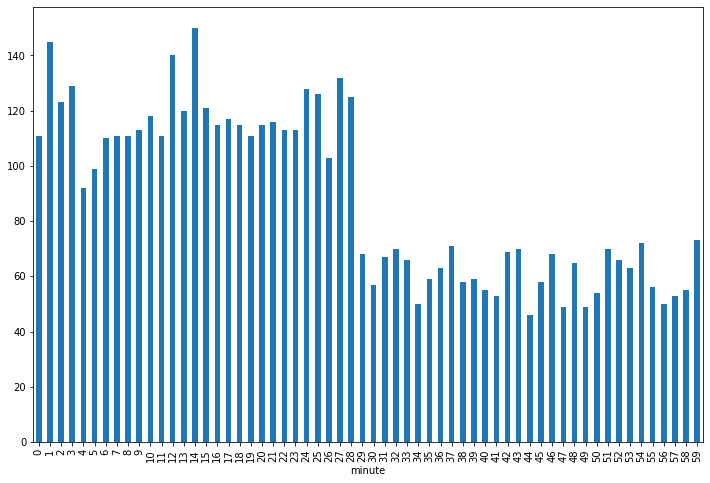

In [84]:
# суммируем все транзакции за каждую минуту, для этого просуммируем все
# значения по каждой строке отдельно и построим plot.bar по этим данным
# сделаем график читаемым - увеличим указав аргумент figsize=(12, 8) 

user_vs_minute_pivot.sum(axis=1).plot.bar(figsize=(12, 8))

In [87]:
df_updated.date.min()

'2020-03-02 00:00:00'

In [88]:
df_updated.date.max()

'2020-03-02 01:29:05'

Ошибка вызвана тем, что в df_updated минуты просто выдернуты из времени начала измерения, а должно быть ск-ко всего прошло минут от начала измерения: 1:15:00 = 75 минут, а у нас указано 15 минут.
Форма аномалии связана с тем, что измерение проводилось в течение 1,5 часов, т.е. с 60 по 89 минуты, измерения просто суммировались.

Для исправления ошибки, нужно изменить строку на тип данных date и затем извлечь правильный формат минуты от начала измерения:

In [91]:
df_updated['date'] = pd.to_datetime(df_updated.date)

In [92]:
df_updated.dtypes

date           datetime64[ns]
name                   object
transaction            object
minute                  int64
dtype: object

In [93]:
# из даты: кол-во минут + кол-во часов * 60 (минут)

df_updated['true_minute'] = df_updated.date.dt.minute + df_updated.date.dt.hour * 60

/home/ag/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='true_minute', ylabel='count'>

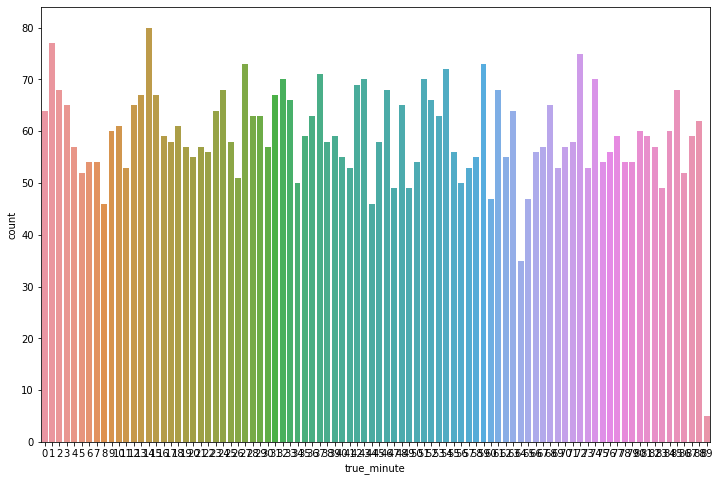

In [100]:
# строим график countplot (считаем кол-во) и смотрим на распределение
# сделаем его крупнее, указав figsize=(12, 8) параметр из matplotlib
# видим относительно равномерное распределение - ошибка исправлена

plt.figure(figsize=(12, 8))
sns.countplot(df_updated.true_minute)